In [6]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)

In [7]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

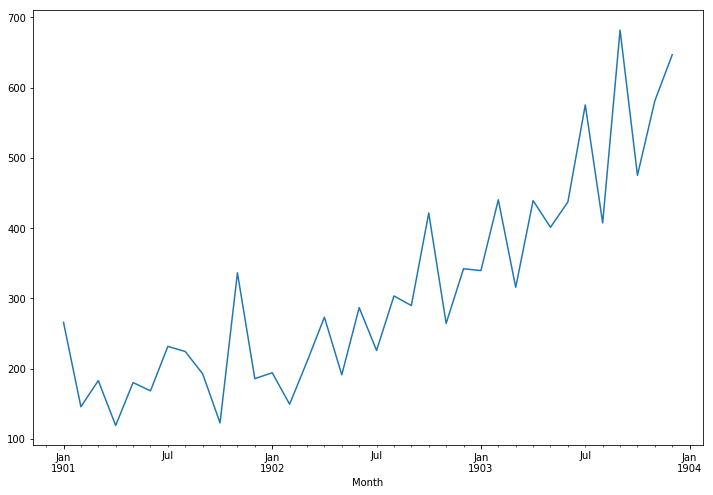

In [8]:
#let's look at the data
%matplotlib inline
series.plot(figsize=(12,8));

In [9]:
import statsmodels.api as sm
sm.stats.durbin_watson(series)

0.09548538187456361

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


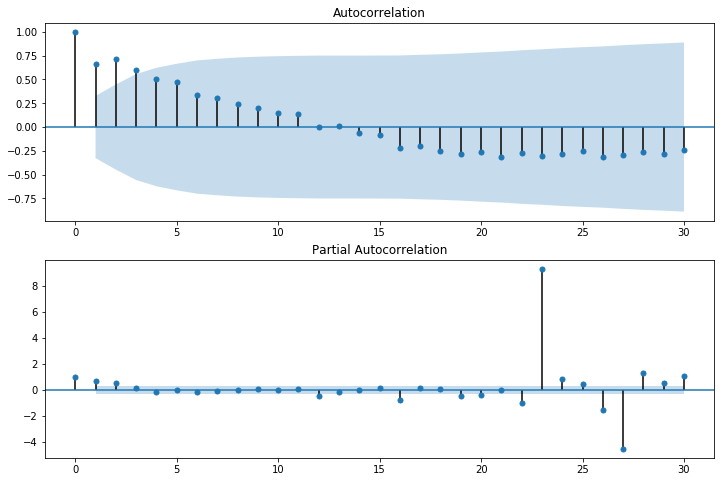

In [13]:
#So the durbin watson test is right in the middle of it's scale (0-2) so moderate chance of autocorrelation
#let's check the graphs
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=30, ax=ax2)

In [25]:
shampooarima = sm.tsa.ARMA(series.values, (2,0)).fit()
print(shampooarima.params)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

[3.13426185e+02 3.05824554e-01 6.94175436e-01]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
print(shampooarima.aic, shampooarima.bic, shampooarima.hqic)

438.373106956125 444.70718270994945 440.58386904686586


In [29]:
#since the durbin watson test shows a score near 2, there is no significant autocorrelation
sm.stats.durbin_watson(shampooarima.resid)

2.147332614710234

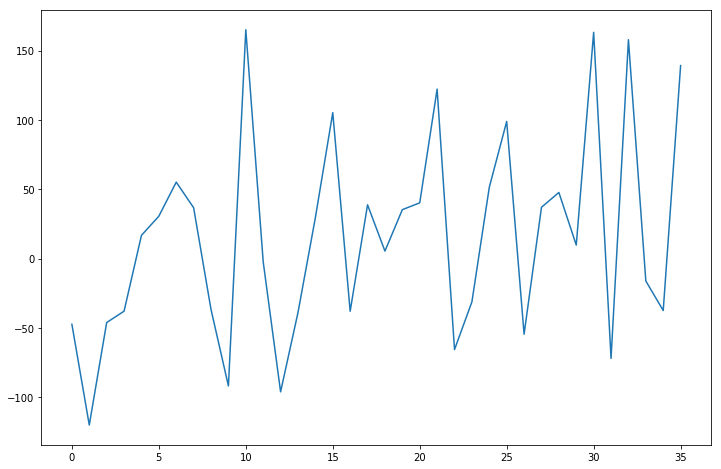

In [33]:
# show plots in the notebook
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = pyplot.plot(shampooarima.resid)

In [39]:
from scipy import stats
resid = shampooarima.resid
stats.normaltest(resid)

NormaltestResult(statistic=1.5719950249992438, pvalue=0.45566494353301323)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


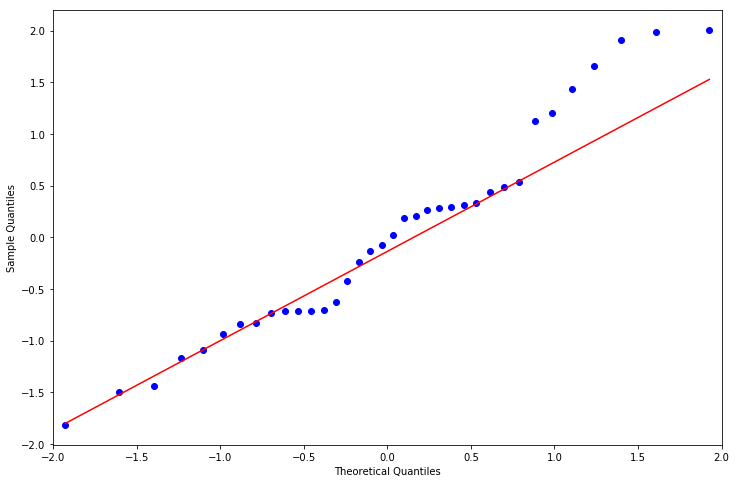

In [42]:
# show plots in the notebook
from statsmodels.graphics.api import qqplot
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [51]:
import numpy as np
import pandas as pd
r,q,p = sm.tsa.acf(resid.squeeze(), qstat=True)
data = np.c_[range(1,36), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.167310   1.094115  0.295561
2.0  -0.084538   1.381661  0.501160
3.0   0.060668   1.534240  0.674390
4.0   0.033994   1.583641  0.811729
5.0   0.170916   2.872753  0.719596
6.0  -0.115816   3.484406  0.746043
7.0   0.043078   3.571943  0.827548
8.0  -0.010606   3.577439  0.893097
9.0  -0.051281   3.710681  0.929403
10.0  0.094042   4.176004  0.939058
11.0  0.279017   8.435978  0.673799
12.0 -0.145248   9.638513  0.647640
13.0 -0.078879  10.008579  0.693233
14.0  0.060834  10.238702  0.744532
15.0  0.176387  12.265453  0.658835
16.0 -0.194573  14.854980  0.535285
17.0  0.021826  14.889278  0.603457
18.0 -0.037352  14.995312  0.662289
19.0 -0.111947  16.003780  0.657026
20.0  0.046221  16.186442  0.704992
21.0 -0.086011  16.861136  0.719489
22.0  0.144184  18.892520  0.651956
23.0 -0.141205  20.990699  0.581656
24.0 -0.102929  22.198461  0.567423
25.0  0.144075  24.779968  0.474758
26.0 -0.034426  24.942092  0

In [59]:
predict_shampoo = shampooarima.predict(37,49, dynamic=True)
print(predict_shampoo)

[646.89999684 646.89999588 646.89999339 646.89999196 646.89998979
 646.89998814 646.89998613 646.89998437 646.89998243 646.89998062
 646.89997872 646.89997688 646.899975  ]
